In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_labels = pd.read_csv('../datasets/train_labels.csv')

In [3]:
train_values = pd.read_csv('../datasets/train_values.csv')

In [4]:
anio_edificaciones_mas_antiguas = train_values['age'].max()

In [5]:
anio_edificaciones_mas_antiguas

995

In [6]:
edificaciones_mas_antiguas = train_values.loc[(train_values['age']==anio_edificaciones_mas_antiguas),'building_id']

In [7]:
edificaciones_mas_antiguas = train_labels.merge(edificaciones_mas_antiguas, how='inner')

In [8]:
grado_danio_edificaciones_mas_antiguas = edificaciones_mas_antiguas.groupby('damage_grade')\
    .agg('count').rename(columns={'building_id':'cantidad_de_edificaciones'})

In [9]:
grado_danio_edificaciones_mas_antiguas

,cantidad_de_edificaciones
damage_grade,
1,179
2,822
3,389


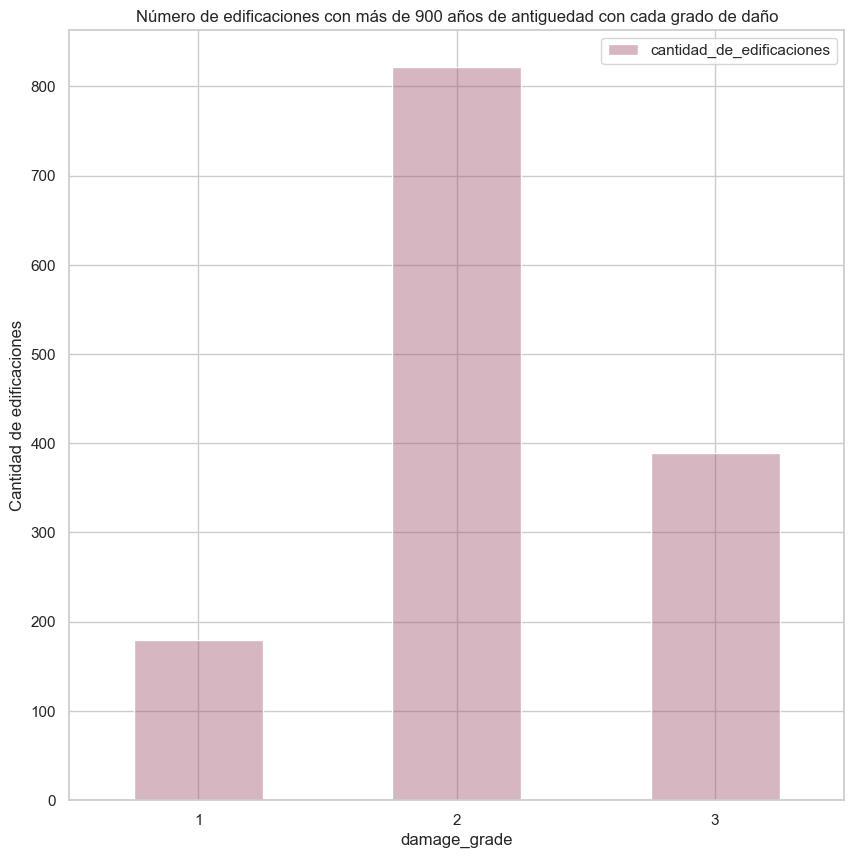

In [10]:
grado_danio_edificaciones_mas_antiguas.plot(kind='bar',figsize=(10,10),rot=0,\
    title='Número de edificaciones con más de 900 años de antiguedad con cada grado de daño',color=(0.6, 0.3, 0.4, 0.4))
ax=plt.gca()
ax.set_xlabel('damage_grade')
ax.set_ylabel('Cantidad de edificaciones');